In [28]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
import random
from sklearn.svm import SVC
random.seed(189)
np.random.seed(189)

if __name__ == "__main__":
    for data_name in ["toy", "mnist", "spam"]:
        data = np.load(f"../data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "training_data", "training_labels", "test_data"
        for field in fields:
            print(field, data[field].shape)



loaded toy data!
training_data (1000, 2)
training_labels (1000,)
test_data (0,)

loaded mnist data!
training_data (60000, 1, 28, 28)
training_labels (60000,)
test_data (10000, 1, 28, 28)

loaded spam data!
training_data (4171, 22)
training_labels (4171,)
test_data (1000, 22)


In [2]:
#q2e
def plot_data_points(data, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels)

def plot_decision_boundary(w, b):
    x = np.linspace(-5, 5, 100)
    y = -(w[0] * x + b) / w[1]
    plt.plot(x, y, 'k')

def plot_margins(w, b):
    w

In [3]:
#q3a

mnist_data = np.load("../data/mnist-data.npz")
spam_data = np.load("../data/spam-data.npz")
print("before process")
print("MNIST Training Data Shape:", mnist_data["training_data"].shape)
print("MNIST Training Label Shape:", mnist_data["training_labels"].shape)
print("SPAM Training Data Shape:", spam_data["training_data"].shape)
print("SPAM Training Label Shape:", spam_data["training_labels"].shape) 

def shuffle_partition_MNIST(data):
    training_data = data["training_data"].reshape(-1, 28 * 28)
    training_labels = data["training_labels"].reshape(-1, 1)
    combined_data = np.hstack((training_data, training_labels))

    np.random.shuffle(combined_data)
    validation_data = combined_data[:10000, :-1]  
    validation_labels = combined_data[:10000, -1]  
    training_data = combined_data[10000:, :-1]  
    training_labels = combined_data[10000:, -1]  

    return validation_data, validation_labels, training_data, training_labels

def shuffle_partition_SPAM(data):
    training_data = data["training_data"]
    training_labels = data["training_labels"].reshape(-1, 1)
    combined_data = np.hstack((training_data, training_labels))

    np.random.shuffle(combined_data)
    index = int(0.2 * len(combined_data))
    validation_data = combined_data[:index, :-1]
    validation_labels = combined_data[:index, -1]
    training_data = combined_data[index:, :-1]
    training_labels = combined_data[index:, -1]
    return validation_data, validation_labels, training_data, training_labels

mnist_validation_data, mnist_validation_labels, mnist_training_data, mnist_training_labels = shuffle_partition_MNIST(mnist_data)
spam_validation_data, spam_validation_labels, spam_training_data, spam_training_labels = shuffle_partition_SPAM(spam_data)  
print("after process") 
print("MNIST Training Data Shape:", mnist_training_data.shape)
print("MNIST Validation Data Shape:", mnist_validation_data.shape)
print("SPAM Training Data Shape:", spam_training_data.shape)
print("SPAM Validation Data Shape:", spam_validation_data.shape) 


before process
MNIST Training Data Shape: (60000, 1, 28, 28)
MNIST Training Label Shape: (60000,)
SPAM Training Data Shape: (4171, 22)
SPAM Training Label Shape: (4171,)
after process
MNIST Training Data Shape: (50000, 784)
MNIST Validation Data Shape: (10000, 784)
SPAM Training Data Shape: (3337, 22)
SPAM Validation Data Shape: (834, 22)


In [2]:

#q3b
def accuracy_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct_predictions = (y_true == y_pred)
    accuracy = np.sum(correct_predictions) / len(y_true)
    return accuracy


Training size: 100, Train Accuracy: 1.00000, Validation Accuracy: 0.74470
Training size: 500, Train Accuracy: 1.00000, Validation Accuracy: 0.86430
Training size: 1000, Train Accuracy: 1.00000, Validation Accuracy: 0.88430
Training size: 2000, Train Accuracy: 1.00000, Validation Accuracy: 0.89680
Training size: 5000, Train Accuracy: 1.00000, Validation Accuracy: 0.90010
Training size: 10000, Train Accuracy: 1.00000, Validation Accuracy: 0.90830
Training size: 15000, Train Accuracy: 1.00000, Validation Accuracy: 0.90920


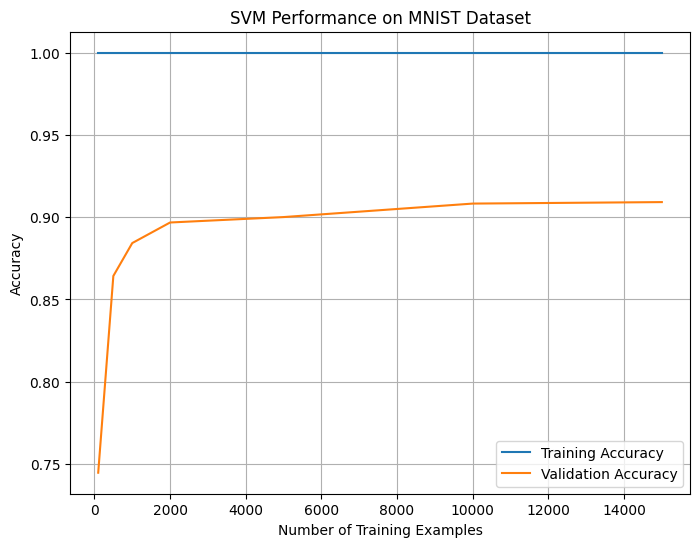

Training size: 100, Train Accuracy: 0.89000, Validation Accuracy: 0.78657
Training size: 200, Train Accuracy: 0.82000, Validation Accuracy: 0.76859
Training size: 500, Train Accuracy: 0.81200, Validation Accuracy: 0.77818
Training size: 1000, Train Accuracy: 0.80300, Validation Accuracy: 0.79616
Training size: 2000, Train Accuracy: 0.81100, Validation Accuracy: 0.79137
Training size: 3337, Train Accuracy: 0.80941, Validation Accuracy: 0.79257


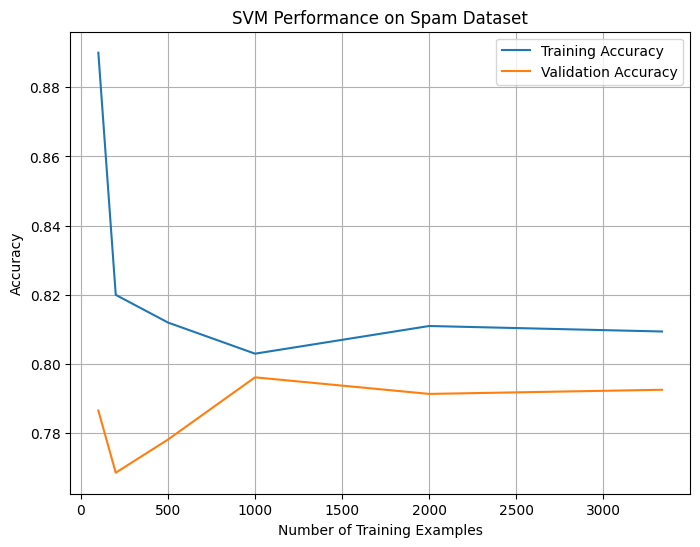

In [5]:
#q4
def train_and_evaluate_svm(training_data, training_labels, validation_data, validation_labels, train_sizes, name):
    training_accuracies = []
    validation_accuracies = []
    for size in train_sizes:
        model = SVC(kernel='linear')
        training_data_subset = training_data[:size]
        training_labels_subset = training_labels[:size]

        model.fit(training_data_subset, training_labels_subset)
        train_predictions = model.predict(training_data_subset)
        train_accuracy = accuracy_score(training_labels_subset, train_predictions)
        training_accuracies.append(train_accuracy)

        validation_predictions = model.predict(validation_data)
        validation_accuracy = accuracy_score(validation_labels, validation_predictions)
        validation_accuracies.append(validation_accuracy)
        
        print(f"Training size: {size}, Train Accuracy: {train_accuracy:.5f}, Validation Accuracy: {validation_accuracy:.5f}")

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, training_accuracies, label="Training Accuracy")
    plt.plot(train_sizes, validation_accuracies, label="Validation Accuracy")
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Accuracy")
    plt.title(f"SVM Performance on {name} Dataset")
    plt.legend()
    plt.grid()
    plt.show()
    
# Example usage for MNIST
train_sizes_mnist = [100, 500, 1000, 2000, 5000, 10000, 15000]
train_and_evaluate_svm(
    mnist_training_data, mnist_training_labels,
    mnist_validation_data, mnist_validation_labels,
    train_sizes_mnist, "MNIST"
)

# Example usage for Spam
train_sizes_spam = [100, 200, 500, 1000, 2000, len(spam_training_data)]
train_and_evaluate_svm(
    spam_training_data, spam_training_labels,
    spam_validation_data, spam_validation_labels,
    train_sizes_spam, "Spam"
)

C: 1e-09, Training Accuracy: 0.6754, Validation Accuracy: 0.6692
C: 1e-08, Training Accuracy: 0.8975, Validation Accuracy: 0.8856
C: 1e-07, Training Accuracy: 0.9386, Validation Accuracy: 0.9205
C: 5e-07, Training Accuracy: 0.9587, Validation Accuracy: 0.9278
C: 1e-06, Training Accuracy: 0.9678, Validation Accuracy: 0.9277
C: 5e-06, Training Accuracy: 0.9881, Validation Accuracy: 0.9187
C: 0.0001, Training Accuracy: 0.9999, Validation Accuracy: 0.9048
C: 0.01, Training Accuracy: 1.0000, Validation Accuracy: 0.9044
Best C: 5e-07, Best Validation Accuracy: 0.9278


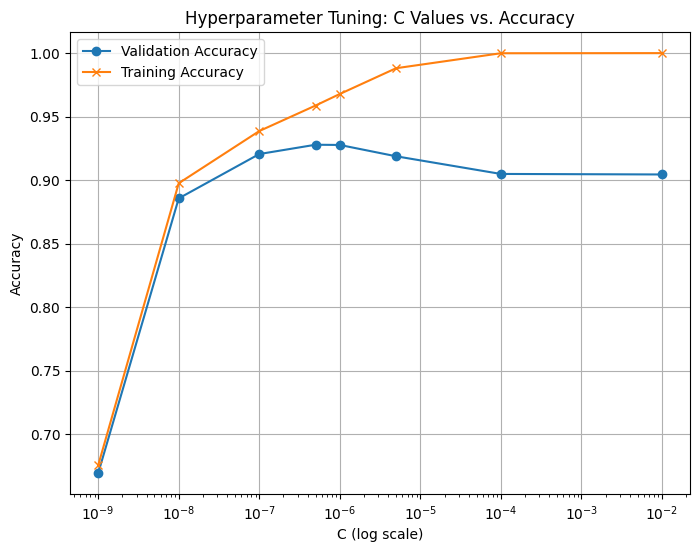

In [14]:
#Q5
mnist_data = np.load("../data/mnist-data.npz")
def q5_shuffle_partition_MNIST(data):
    training_data = data["training_data"].reshape(-1, 28 * 28)
    training_labels = data["training_labels"].reshape(-1, 1)
    combined_data = np.hstack((training_data, training_labels))

    np.random.shuffle(combined_data)
    index = int(0.2 * len(combined_data))
    validation_data = combined_data[:index, :-1]
    validation_labels = combined_data[:index, -1]
    training_data = combined_data[index:, :-1]
    training_labels = combined_data[index:, -1]

    return validation_data, validation_labels, training_data, training_labels

mnist_validation_data, mnist_validation_labels, mnist_training_data, mnist_training_labels = q5_shuffle_partition_MNIST(mnist_data)


C_values = [0.000000001, 0.00000001, 0.0000001, 0.0000005, 0.000001, 0.000005, 0.0001, 0.01]

validation_accuracies = []
training_accuracies = []

training_data = mnist_training_data[:10000]
training_labels = mnist_training_labels[:10000]

for c in C_values:
    model = SVC(kernel='linear', C=c)
    model.fit(training_data, training_labels)
    train_pred = model.predict(training_data)
    train_acc = accuracy_score(training_labels, train_pred)
    training_accuracies.append(train_acc)
    
    validation_predictions = model.predict(mnist_validation_data)
    validation_accuracy = accuracy_score(mnist_validation_labels, validation_predictions)
    validation_accuracies.append(validation_accuracy)

        
    print(f"C: {c}, Training Accuracy: {train_acc:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

best_C = C_values[np.argmax(validation_accuracies)]
best_val_accuracy = max(validation_accuracies)

print(f"Best C: {best_C}, Best Validation Accuracy: {best_val_accuracy:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(C_values, validation_accuracies, label='Validation Accuracy', marker='o')
plt.plot(C_values, training_accuracies, label='Training Accuracy', marker='x')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning: C Values vs. Accuracy')
plt.legend()
plt.grid()
plt.show()


In [7]:
#q6
# spam_data = np.load("../data/spam-data.npz")
spam_data = np.load("../data/test-spam-data.npz")
training_data = spam_data["training_data"]
training_labels = spam_data["training_labels"].reshape(-1, 1)
combined_data = np.hstack((training_data, training_labels))


def k_fold_cross_validation(data, labels, k, C_values):
    fold_size = len(data) // k
    accuracies = {c: [] for c in C_values}

    for c in C_values:
        np.random.shuffle(combined_data)
        data = combined_data[:, :-1]
        labels = combined_data[:, -1]

        for fold in range(k):
            # Split data into training and validation
            val_start = fold * fold_size
            val_end = (fold + 1) * fold_size if fold != k - 1 else len(data)
            validation_data = data[val_start:val_end]
            validation_labels = labels[val_start:val_end]
            training_data = np.concatenate((data[:val_start], data[val_end:]), axis=0)
            training_labels = np.concatenate((labels[:val_start], labels[val_end:]), axis=0)

            # Train the SVM model for this fold
            model = SVC(kernel='linear', C=c)
            model.fit(training_data, training_labels)

            # Validate the model
            predictions = model.predict(validation_data)
            accuracy = np.mean(predictions == validation_labels)
            accuracies[c].append(accuracy)

    # Calculate average accuracy for each C value
    average_accuracies = {c: np.mean(accuracies[c]) for c in C_values}
    best_C = max(average_accuracies, key=average_accuracies.get)
    best_accuracy = average_accuracies[best_C]

    print("Cross-Validation Results:")
    for c, avg_acc in average_accuracies.items():
        print(f"C: {c}, Average Validation Accuracy: {avg_acc:.5f}")
    print(f"Best C: {best_C}, Best Average Validation Accuracy: {best_accuracy:.5f}")

    return best_C, average_accuracies

# Example Usage
C_values = [1e-3, 0.01, 0.1, 1, 5, 10, 50, 100]
k = 5
# Assuming spam_training_data and spam_training_labels are loaded and preprocessed
best_C, accuracies = k_fold_cross_validation(spam_training_data, spam_training_labels.flatten(), k, C_values)


Cross-Validation Results:
C: 0.001, Average Validation Accuracy: 0.75130
C: 0.01, Average Validation Accuracy: 0.77455
C: 0.1, Average Validation Accuracy: 0.79467
C: 1, Average Validation Accuracy: 0.79932
C: 5, Average Validation Accuracy: 0.80376
C: 10, Average Validation Accuracy: 0.80306
C: 50, Average Validation Accuracy: 0.80529
C: 100, Average Validation Accuracy: 0.80396
Best C: 50, Best Average Validation Accuracy: 0.80529


In [29]:
import pandas as pd
def results_to_csv(y_test, file_name):
    y_test = y_test.astype(int)  
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  
    df.to_csv(file_name, index_label='Id')

In [30]:
%run featurize.py

In [17]:
#Q7 MNIST
mnist_data = np.load("../data/mnist-data.npz")

training_data, training_labels = mnist_data["training_data"].reshape(-1, 28 * 28), mnist_data["training_labels"]
test_data = mnist_data["test_data"].reshape(-1, 28 * 28)

final_model = SVC(kernel='linear', C=1e-06)
final_model.fit(training_data, training_labels)
mnist_test_predictions = final_model.predict(test_data)

results_to_csv(mnist_test_predictions, "mnist_submission.csv")

In [32]:
#Q7 SPAM
spam_data = np.load("../data/test-spam-data.npz")

spam_training_data, spam_training_labels = spam_data["training_data"], spam_data["training_labels"]
spam_test_data = spam_data["test_data"]

spam_final_model = SVC(kernel='linear', C=100)
spam_final_model.fit(spam_training_data, spam_training_labels)
spam_test_predictions = spam_final_model.predict(spam_test_data)

results_to_csv(spam_test_predictions, "spam_sub1.csv")

In [8]:
import numpy as np
from sklearn.svm import SVC

def k_fold_cross_validation(data, labels, k, C_values):
    fold_size = len(data) // k
    accuracies = {c: [] for c in C_values}
    
    for c in C_values:
        print(f"Testing C = {c}")
        # Shuffle and partition data for each C
        combined_data = np.hstack((data, labels.reshape(-1, 1)))
        np.random.shuffle(combined_data)
        
        # Split into data and labels again after shuffling
        data_shuffled = combined_data[:, :-1]
        labels_shuffled = combined_data[:, -1]

        for fold in range(k):
            # Split data into training and validation
            val_start = fold * fold_size
            val_end = (fold + 1) * fold_size if fold != k - 1 else len(data)
            validation_data = data_shuffled[val_start:val_end]
            validation_labels = labels_shuffled[val_start:val_end]
            training_data = np.concatenate((data_shuffled[:val_start], data_shuffled[val_end:]), axis=0)
            training_labels = np.concatenate((labels_shuffled[:val_start], labels_shuffled[val_end:]), axis=0)

            # Train the SVM model for this fold
            model = SVC(kernel='linear', C=c)
            model.fit(training_data, training_labels)

            # Validate the model
            predictions = model.predict(validation_data)
            accuracy = np.mean(predictions == validation_labels)
            accuracies[c].append(accuracy)

    # Calculate average accuracy for each C value
    average_accuracies = {c: np.mean(accuracies[c]) for c in C_values}
    best_C = max(average_accuracies, key=average_accuracies.get)
    best_accuracy = average_accuracies[best_C]

    print("\nCross-Validation Results:")
    for c, avg_acc in average_accuracies.items():
        print(f"C: {c}, Average Validation Accuracy: {avg_acc:.5f}")
    print(f"Best C: {best_C}, Best Average Validation Accuracy: {best_accuracy:.5f}")

    return best_C, average_accuracies

# Load the data
spam_data = np.load("../data/test-spam-data.npz")
training_data = spam_data["training_data"]
training_labels = spam_data["training_labels"]

# Example Usage
C_values = [1, 5, 10, 50, 100]
k = 5

best_C, accuracies = k_fold_cross_validation(training_data, training_labels, k, C_values)


Testing C = 1


In [20]:
spam_data = np.load("../data/test-spam-data.npz")
training_data = spam_data["training_data"]
training_labels = spam_data["training_labels"].reshape(-1, 1)
combined_data = np.hstack((training_data, training_labels))


def k_fold_cross_validation(data, labels, k, C=100):
    """
    Perform k-fold cross-validation using SVM with a fixed value of C.
    :param data: Feature data
    :param labels: Corresponding labels
    :param k: Number of folds
    :param C: Regularization parameter for SVM
    :return: Average accuracy across folds
    """
    fold_size = len(data) // k
    accuracies = []

    np.random.shuffle(combined_data)
    data = combined_data[:, :-1]
    labels = combined_data[:, -1]

    for fold in range(k):
        # Split data into training and validation
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size if fold != k - 1 else len(data)
        validation_data = data[val_start:val_end]
        validation_labels = labels[val_start:val_end]
        training_data = np.concatenate((data[:val_start], data[val_end:]), axis=0)
        training_labels = np.concatenate((labels[:val_start], labels[val_end:]), axis=0)

        # Train the SVM model for this fold
        model = SVC(kernel='linear', C=C)
        model.fit(training_data, training_labels)

        # Validate the model
        predictions = model.predict(validation_data)
        accuracy = np.mean(predictions == validation_labels)
        accuracies.append(accuracy)

    # Calculate average accuracy across all folds
    average_accuracy = np.mean(accuracies)
    return average_accuracy


# Example Usage
k = 5
C = 100
spam_data = np.load("../data/test-spam-data.npz")
training_data = spam_data["training_data"]
training_labels = spam_data["training_labels"].reshape(-1, 1)
combined_data = np.hstack((training_data, training_labels))
# Perform k-fold cross-validation and get the accuracy
average_accuracy = k_fold_cross_validation(training_data, training_labels.flatten(), k, C)
print(f"Average Validation Accuracy for C = {C}: {average_accuracy:.5f}")


Average Validation Accuracy for C = 100: 0.86693


In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

spam_data = np.load("../data/test-spam-data.npz")
training_data = spam_data["training_data"]
training_labels = spam_data["training_labels"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    training_data, training_labels, test_size=0.2, random_state=42
)

# Train the SVM model with C = 100
model = SVC(kernel='linear', C=100)
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy for C = 100: {accuracy:.5f}")

Validation Accuracy for C = 100: 0.87066


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

def find_best_C(X, y, C_values, cv=5):
    """
    Find the best C value for a linear SVM using cross-validation.

    Parameters:
    - X: ndarray
        Feature matrix.
    - y: ndarray
        Labels.
    - C_values: list
        List of C values to test.
    - cv: int
        Number of cross-validation folds (default: 5).

    Returns:
    - best_C: float
        Best C value.
    - results: dict
        Dictionary mapping C values to their average cross-validation accuracy.
    """
    results = {}
    for C in C_values:
        print(f"Testing C = {C}...")
        model = SVC(kernel='linear', C=C)
        # Perform cross-validation and compute mean accuracy
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        results[C] = np.mean(scores)
        print(f"Average CV Accuracy for C={C}: {results[C]:.5f}")

    # Find the best C based on highest accuracy
    best_C = max(results, key=results.get)
    print("\nBest C:", best_C)
    print("Best Accuracy:", results[best_C])

    return best_C, results

# Example Usage
# Assuming you have your feature matrix `X` and labels `y`
spam_data = np.load("../data/test-spam-data.npz")
X = spam_data["training_data"]
y = spam_data["training_labels"]

# List of C values to test
C_values = [0.001, 0.01, 0.1, 1, 10, 50, 100]
best_C, results = find_best_C(X, y, C_values, cv=5)

print("\nC values and their accuracies:")
for C, acc in results.items():
    print(f"C={C}: Accuracy={acc:.5f}")

print(f"\nThe best C is {best_C}")


Testing C = 0.001...
Average CV Accuracy for C=0.001: 0.77200
Testing C = 0.01...
Average CV Accuracy for C=0.01: 0.82570
Testing C = 0.1...
Average CV Accuracy for C=0.1: 0.85183
Testing C = 1...
Average CV Accuracy for C=1: 0.86550
Testing C = 10...
Average CV Accuracy for C=10: 0.87293
Testing C = 50...
Average CV Accuracy for C=50: 0.87341
Testing C = 100...
Average CV Accuracy for C=100: 0.87461

Best C: 100
Best Accuracy: 0.8746081936845733

C values and their accuracies:
C=0.001: Accuracy=0.77200
C=0.01: Accuracy=0.82570
C=0.1: Accuracy=0.85183
C=1: Accuracy=0.86550
C=10: Accuracy=0.87293
C=50: Accuracy=0.87341
C=100: Accuracy=0.87461

The best C is 100


In [14]:
# def accuracy_score(y_true, y_pred):
#     y_true = np.array(y_true)
#     y_pred = np.array(y_pred)
    
#     # Compare true labels with predicted labels
#     correct_predictions = (y_true == y_pred)
    
#     # Calculate accuracy
#     accuracy = np.sum(correct_predictions) / len(y_true)
#     return accuracy

Training size: 100, Train Accuracy: 0.92000, Validation Accuracy: 0.77126
Training size: 200, Train Accuracy: 0.88000, Validation Accuracy: 0.78802
Training size: 500, Train Accuracy: 0.83600, Validation Accuracy: 0.77365
Training size: 1000, Train Accuracy: 0.82700, Validation Accuracy: 0.78443
Training size: 2000, Train Accuracy: 0.81600, Validation Accuracy: 0.78323
Training size: 3336, Train Accuracy: 0.81475, Validation Accuracy: 0.78802


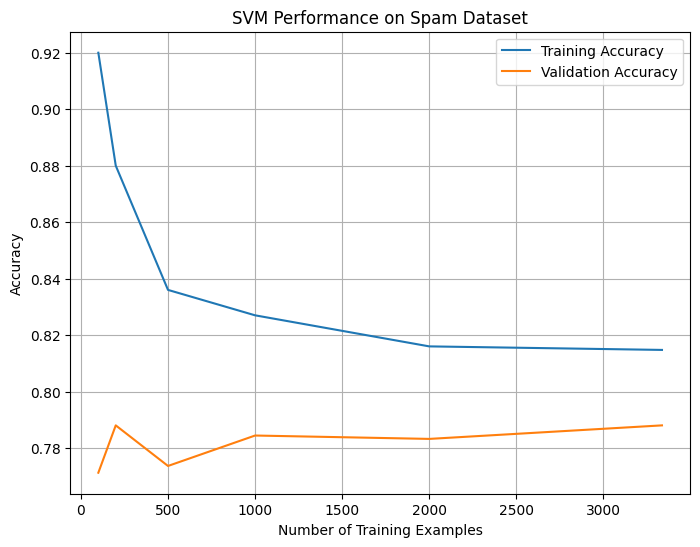

In [15]:
# def train_and_evaluate_svm(training_data, training_labels, validation_data, validation_labels, train_sizes, name):
#     training_accuracies = []
#     validation_accuracies = []
#     for size in train_sizes:
#         model = SVC(kernel='linear', C=10)
#         training_data_subset = training_data[:size]
#         training_labels_subset = training_labels[:size]

#         model.fit(training_data_subset, training_labels_subset)
#         train_predictions = model.predict(training_data_subset)
#         train_accuracy = accuracy_score(training_labels_subset, train_predictions)
#         training_accuracies.append(train_accuracy)

#         validation_predictions = model.predict(validation_data)
#         validation_accuracy = accuracy_score(validation_labels, validation_predictions)
#         validation_accuracies.append(validation_accuracy)
        
#         print(f"Training size: {size}, Train Accuracy: {train_accuracy:.5f}, Validation Accuracy: {validation_accuracy:.5f}")

#     plt.figure(figsize=(8, 6))
#     plt.plot(train_sizes, training_accuracies, label="Training Accuracy")
#     plt.plot(train_sizes, validation_accuracies, label="Validation Accuracy")
#     plt.xlabel("Number of Training Examples")
#     plt.ylabel("Accuracy")
#     plt.title(f"SVM Performance on {name} Dataset")
#     plt.legend()
#     plt.grid()
#     plt.show()

# train_sizes_spam = [100, 200, 500, 1000, 2000, len(spam_training_data)]
# train_and_evaluate_svm(
#     spam_training_data, spam_training_labels,
#     spam_validation_data, spam_validation_labels,
#     train_sizes_spam, "Spam"
# )

In [16]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # Normalize data
# spam_data = np.load("data/spam-data.npz")
# spam_validation_data, spam_validation_labels, spam_training_data, spam_training_labels = shuffle_partition_SPAM(spam_data)
# scaler = StandardScaler()
# spam_training_data = scaler.fit_transform(spam_training_data)
# spam_test_data = scaler.transform(spam_data["test_data"])

# # Train-test split
# X_train, X_val, y_train, y_val = train_test_split(
#     spam_training_data, spam_training_labels, train_size=0.8, random_state=42
# )

# # Train SVM with class weighting
# model = SVC(kernel='linear', C=10, class_weight='balanced')
# model.fit(X_train, y_train)

# # Evaluate on validation set
# y_val_pred = model.predict(X_val)
# validation_accuracy = accuracy_score(y_val, y_val_pred)

# print(f"Validation Accuracy: {validation_accuracy:.5f}")


Validation Accuracy: 0.82784


In [ ]:
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.utils import shuffle

# spam_data = np.load("data/spam-data.npz")
# def shuffle_partition_SPAM(data):
#     training_data = data["training_data"]
#     training_labels = data["training_labels"].reshape(-1, 1)
#     combined_data = np.hstack((training_data, training_labels))

#     np.random.shuffle(combined_data)
#     index = int(0.8 * len(combined_data))
#     training_data = combined_data[:index, :-1]
#     training_labels = combined_data[:index, -1]
#     validation_data = combined_data[index:, :-1]
#     validation_labels = combined_data[index:, -1]
#     return validation_data, validation_labels, training_data, training_labels

# spam_validation_data, spam_validation_labels, spam_training_data, spam_training_labels = shuffle_partition_SPAM(spam_data)  

# def k_fold_cross_validation(data, labels, k, C_values):
#     """
#     Perform k-fold cross-validation on the dataset.
    
#     Parameters:
#         data: np.ndarray - Feature matrix
#         labels: np.ndarray - Label vector
#         k: int - Number of folds
#         C_values: list - List of C values to test
        
#     Returns:
#         best_C: float - Best C value based on cross-validation accuracy
#         accuracies: dict - Average validation accuracy for each C value
#     """
#     fold_size = len(data) // k
#     accuracies = {C: [] for C in C_values}
    
#     # Shuffle the dataset
#     data, labels = shuffle(data, labels, random_state=42)
    
#     for fold in range(k):
#         # Create train-validation split for the current fold
#         val_start = fold * fold_size
#         val_end = (fold + 1) * fold_size if fold != k - 1 else len(data)
        
#         validation_data = data[val_start:val_end]
#         validation_labels = labels[val_start:val_end]
        
#         training_data = np.concatenate((data[:val_start], data[val_end:]), axis=0)
#         training_labels = np.concatenate((labels[:val_start], labels[val_end:]), axis=0)
        
#         for C in C_values:
#             # Train the SVM model with the current C
#             model = SVC(kernel='linear', C=C)
#             model.fit(training_data, training_labels)
            
#             # Validate the model
#             predictions = model.predict(validation_data)
#             accuracy = np.mean(predictions == validation_labels)
#             accuracies[C].append(accuracy)
    
#     # Calculate the average accuracy for each C
#     average_accuracies = {C: np.mean(accuracies[C]) for C in C_values}
    
#     # Find the best C
#     best_C = max(average_accuracies, key=average_accuracies.get)
#     best_accuracy = average_accuracies[best_C]
    
#     print("Cross-Validation Results:")
#     for C, avg_acc in average_accuracies.items():
#         print(f"C: {C}, Average Validation Accuracy: {avg_acc:.5f}")
#     print(f"Best C: {best_C}, Best Average Validation Accuracy: {best_accuracy:.5f}")
    
#     return best_C, average_accuracies

# # Example Usage
# C_values = [1e-8, 1e-5, 1e-3, 0.01, 0.1, 1, 10, 100]
# k = 5

# # Assuming spam_training_data and spam_training_labels are loaded
# spam_training_labels = spam_training_labels.flatten()  # Ensure labels are 1D

# best_C, accuracies = k_fold_cross_validation(spam_training_data, spam_training_labels, k, C_values)

# # Retrain the final model on the entire training set with the best C
# final_spam_model = SVC(kernel='linear', C=best_C)
# final_spam_model.fit(spam_training_data, spam_training_labels)

# # Make predictions on the test set
# spam_test_predictions = final_spam_model.predict(spam_data["test_data"])

# # Save predictions to CSV
# results_to_csv(spam_test_predictions, "spam_submission.csv")
